In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("../data/전처리데이터/성동구 최종 데이터.csv", encoding='cp949')
print(df.shape)
print(df.head())
print(df.columns)

(432, 18)
   Unnamed: 0  ARS-ID  버스 총 승차수  쉼터여부    NODE_ID            정류소명         위도  \
0           0    4001     39270     0  103000001         답십리역사거리  37.565426   
1           1    4002     37286     0  103000002  청년회의소.서울새활용플라자  37.561952   
2           2    4003     61371     0  103000003            장한평역  37.561131   
3           3    4101     17969     1  103000004           상왕십리역  37.564279   
4           4    4102     35007     1  103000005           상왕십리역  37.564609   

           경도  버스 수                                          버스 노선 리스트  \
0  127.054368     6        ['9403', '370', '303', 'N30', '721', '130']   
1  127.060479     9  ['9403', '3216', '2221', '370', '3220', '303',...   
2  127.066098    10  ['9403', '2416', '3216', '2221', '370', '3220'...   
3  127.029260     5             ['2012', 'N62', '2014', '2015', '463']   
4  127.028642    11  ['302', '2013', '2012', 'N62', '2014', '463', ...   

   평균 배차 간격  최대 배차 간격 가장 가까운 지하철역  지하철역 최단거리(m)   도로명      도로폭  도로폭_숫자

In [28]:
# 결측 값 측정
df.isnull().sum()

Unnamed: 0      0
ARS-ID          0
버스 총 승차수        0
쉼터여부            0
NODE_ID         0
정류소명            0
위도              0
경도              0
버스 수            0
버스 노선 리스트       0
평균 배차 간격        0
최대 배차 간격        0
가장 가까운 지하철역     0
지하철역 최단거리(m)    0
도로명             0
도로폭             0
도로폭_숫자          0
18세 이상          0
dtype: int64

In [29]:
df1 = df[['버스 수','버스 총 승차수','평균 배차 간격','지하철역 최단거리(m)','도로폭_숫자','18세 이상']]
df1.corr(method='pearson')

,버스 수,버스 총 승차수,평균 배차 간격,지하철역 최단거리(m),도로폭_숫자,18세 이상
버스 수,1.000000,0.669460,0.015909,0.032271,0.163099,-0.057703
버스 총 승차수,0.669460,1.000000,-0.044343,-0.055040,0.173162,-0.073405
평균 배차 간격,0.015909,-0.044343,1.000000,0.022038,0.226308,-0.175538
지하철역 최단거리(m),0.032271,-0.055040,0.022038,1.000000,0.054187,-0.256544
도로폭_숫자,0.163099,0.173162,0.226308,0.054187,1.000000,-0.396811
18세 이상,-0.057703,-0.073405,-0.175538,-0.256544,-0.396811,1.000000


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.


<AxesSubplot:>

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\I

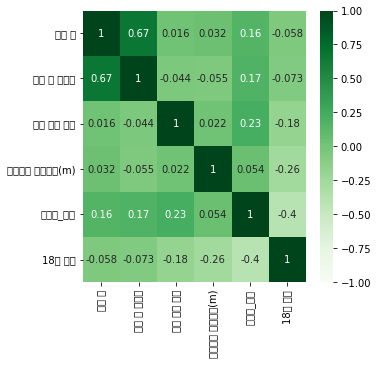

In [30]:
import seaborn as sb
plt.rcParams["figure.figsize"]= (5,5)
sb.heatmap(df1.corr(),
           annot = True, #실제 값 화면에 표시
           cmap = 'Greens', #색상
           vmin = -1, vmax = 1
           )

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"] = df1.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,8.341743,평균 배차 간격
1,5.957052,18세 이상
2,4.189160,버스 수
3,2.935119,도로폭_숫자
4,2.706637,지하철역 최단거리(m)
5,2.616381,버스 총 승차수


In [37]:
from sklearn.model_selection import train_test_split
x = df1  #변수 지정
y = df["쉼터여부"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [38]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.89
검증용 데이터셋 정확도 : 0.89


In [40]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        78
           1       0.33      0.11      0.17         9

    accuracy                           0.89        87
   macro avg       0.62      0.54      0.55        87
weighted avg       0.85      0.89      0.86        87



In [41]:
import statsmodels.api as sm
logit = sm.Logit(df[['쉼터여부']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.269070
         Iterations 7


In [42]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.195     
Dependent Variable: 쉼터여부             AIC:              244.4763  
Date:               2022-08-09 16:28 BIC:              268.8869  
No. Observations:   432              Log-Likelihood:   -116.24   
Df Model:           5                LL-Null:          -144.35   
Df Residuals:       426              LLR p-value:      7.3110e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
버스 수           0.2722    0.0910   2.9898  0.0028   0.0938   0.4507
버스 총 승차수       0.0000    0.0000   2.6493  0.0081   0.0000   0.0001
평균 배차 간격      -0.1580    0.0609  -2.5957  0.0094  -0.2774  -0.0387
지하철역 최단거리(m)  -0.0005    0.0005  -1.1182  0.2635  -0.0014   0.0004
도로폭_숫자         0.1069    0.0844   1.2679  0.2048  -0.0584   0.2723
18세 이상        -0.0001    0.0000  -3.2292  0.0012  -0.0002  -0.0000
=================================================================

"""

In [43]:
#오즈비가 1을 기준으로 큰지 작은지를 파악하여 종속변수에 미치는 영향의 방향을 파악할 수 있다. 독립변수가 두개 이상 있을 때는 다른 독립변수를 일정한 값으로 고정한 경우의 오즈비로 해석된다. 
#아무런 관계없을 때 오즈비는 1이다. 1에서 멀리 떨어질수록 종속변수와의 관계가 강하다는 뜻이다. 즉, 종속변수 여부에 큰 영향을 준다는 뜻이다. 
np.exp(result.params) 

버스 수            1.312871
버스 총 승차수        1.000041
평균 배차 간격        0.853820
지하철역 최단거리(m)    0.999482
도로폭_숫자          1.112876
18세 이상          0.999892
dtype: float64

In [44]:
# x들의 회귀계수
print(log.coef_)

[[ 0.49362373  0.45080937 -0.32098159 -0.01497291  0.2614374  -0.27042133]]
